In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [23]:
km_df = tools.get_dataframe('pipkmks', 'spring', 'data').Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
kp_df = tools.get_dataframe('pimkpks', 'spring', 'data').Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)

In [24]:
km_df = km_df.Define('km_p', 'sqrt(km_px*km_px + km_py*km_py + km_pz*km_pz)')
kp_df = kp_df.Define('kp_p', 'sqrt(kp_px*kp_px + kp_py*kp_py + kp_pz*kp_pz)')

In [25]:
for label in km_df.GetColumnNames():
    if 'bcal' in str(label):
        print(label)

pip1_ebcal
pip1_eprebcal
pip1_bcal_delphi
pip1_bcal_delz
km_ebcal
km_eprebcal
km_bcal_delphi
km_bcal_delz
p_ebcal
p_eprebcal
p_bcal_delphi
p_bcal_delz
pim_ebcal
pim_eprebcal
pim_bcal_delphi
pim_bcal_delz
pip2_ebcal
pip2_eprebcal
pip2_bcal_delphi
pip2_bcal_delz


In [38]:
hist_km_p_vs_ebcal = km_df.Histo2D(('km_p_vs_ebcal', 'E(BCAL) vs #vec{P} vs. for K^{#pm}', 100, 0, 10, 100, 0, 3), 'km_p', 'km_ebcal')
hist_kp_p_vs_ebcal = kp_df.Histo2D(('kp_p_vs_ebcal', 'E(BCAL) vs #vec{P} vs. for K^{#pm}', 100, 0, 10, 100, 0, 3), 'kp_p', 'kp_ebcal')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


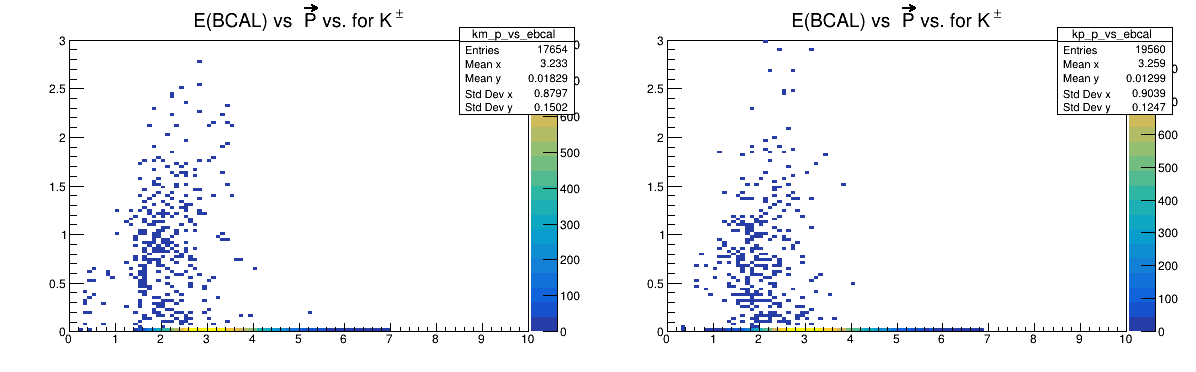

In [39]:
c = ROOT.TCanvas('c', 'c', 1200, 400)
c.Divide(2,1)
c.cd(1)
hist_km_p_vs_ebcal.Draw('colz')
c.cd(2)
hist_kp_p_vs_ebcal.Draw('colz')
c.Draw()
